In [2]:
import os
import sys
import urllib.request
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential, Model
from tensorflow.keras.layers import LSTM, Dense, Dropout, Input

In [6]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


In [3]:
spatial_data = "PEMS_08\PEMS_08_GCN.csv"
temporal_data = "PEMS_08\PEMS_08.csv"

In [4]:
speed_data = pd.read_csv(temporal_data, header=None)
num_nodes, time_len = speed_data.shape
print("No. of sensors:", num_nodes, "\nNo of timesteps:", time_len)

No. of sensors: 170 
No of timesteps: 17856


In [5]:
#using only 1/4th data
span = speed_data.shape[1]//4
speed_data = speed_data.iloc[:, span:span*2]
speed_data.shape

(170, 4464)

In [6]:
span

4464

In [7]:
speed_data

,4464,4465,4466,4467,4468,4469,4470,4471,4472,4473,...,8918,8919,8920,8921,8922,8923,8924,8925,8926,8927
0,60.8,62.7,61.4,60.6,61.5,62.5,61.7,61.0,60.5,60.9,...,69.6,69.6,69.4,69.8,69.7,70.2,70.0,70.2,70.1,70.1
1,61.1,62.3,62.7,62.6,62.2,61.3,62.6,62.1,61.2,60.6,...,67.8,69.5,68.6,69.2,66.5,65.8,68.3,68.9,68.6,70.7
2,63.3,63.9,63.6,64.3,64.2,64.4,64.4,64.9,64.7,64.7,...,64.0,63.9,65.3,64.2,65.8,63.7,66.2,64.0,65.6,65.5
3,64.2,62.8,61.4,63.3,64.2,62.9,61.4,60.5,61.0,59.3,...,69.0,68.3,67.0,69.4,68.9,67.7,68.1,66.5,68.0,68.7
4,52.2,49.8,53.0,59.4,58.9,52.9,49.0,46.6,43.5,41.7,...,68.6,69.7,70.2,69.0,69.4,68.4,70.1,71.4,67.3,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,66.0,68.2,66.0,66.5,66.4,65.5,65.3,66.1,67.6,67.2,...,66.6,67.8,67.8,68.1,67.4,67.9,67.7,68.3,67.3,67.7
166,60.0,60.4,59.8,60.0,60.7,61.6,61.0,60.7,60.2,59.7,...,64.3,64.1,64.0,64.1,63.4,64.0,64.6,65.2,64.9,65.1
167,20.6,21.6,24.7,30.1,26.3,25.1,26.7,27.3,26.4,28.0,...,65.5,66.6,65.8,64.7,63.4,65.6,66.9,65.3,65.8,68.6
168,46.5,46.1,47.7,46.1,48.9,46.4,49.6,51.6,50.5,51.4,...,62.5,63.8,66.0,68.2,68.4,65.8,66.0,66.0,66.6,65.2


In [8]:
sensor_dist_adj = pd.read_csv(spatial_data, index_col=None, header=None)
sensor_dist_adj

,0,1,2,3,4,5,6,7,8,9,...,160,161,162,163,164,165,166,167,168,169
0,0.0,0.0000,0.0000,0.0,0.0000,0.0,0.0,0.0000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0000,0.0000,0.0
1,0.0,0.0000,0.3716,0.0,0.0000,0.0,0.0,0.0000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0000,0.0000,0.0
2,0.0,0.3716,0.0000,0.0,0.3381,0.0,0.0,0.0000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0000,0.0000,0.0
3,0.0,0.0000,0.0000,0.0,0.0000,0.0,0.0,0.0000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0000,0.0000,0.0
4,0.0,0.0000,0.3381,0.0,0.0000,0.0,0.0,0.0000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0000,0.0000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,0.0,0.0000,0.0000,0.0,0.0000,0.0,0.0,0.0000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0000,0.0000,0.0
166,0.0,0.0000,0.0000,0.0,0.0000,0.0,0.0,0.0000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0000,0.0000,0.0
167,0.0,0.0000,0.0000,0.0,0.0000,0.0,0.0,0.0000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.3652,0.0,0.0,0.0000,0.1724,0.0
168,0.0,0.0000,0.0000,0.0,0.0000,0.0,0.0,0.0000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.1724,0.0000,0.0


In [9]:
def train_test_split(data, train_portion):
    time_len = data.shape[1]
    train_size = int(time_len * train_portion)
    train_data = np.array(data.iloc[:, :train_size])
    test_data = np.array(data.iloc[:, train_size:])
    return train_data, test_data

In [10]:
train_rate = 0.8

In [11]:
train_data, test_data = train_test_split(speed_data, train_rate)
print("Train data: ", train_data.shape)
print("Test data: ", test_data.shape)

Train data:  (170, 3571)
Test data:  (170, 893)


In [12]:
def scale_data(train_data, test_data):
    max_speed = train_data.max()
    min_speed = train_data.min()
    train_scaled = (train_data - min_speed) / (max_speed - min_speed)
    test_scaled = (test_data - min_speed) / (max_speed - min_speed)
    return train_scaled, test_scaled

In [13]:
train_scaled, test_scaled = scale_data(train_data, test_data)

In [14]:
seq_len = 20
pre_len = 23

In [15]:
def sequence_data_preparation(seq_len, pre_len, train_data, test_data):
    trainX, trainY, testX, testY = [], [], [], []

    for i in range(train_data.shape[1] - int(seq_len + pre_len - 1)):
        a = train_data[:, i : i + seq_len + pre_len]
        trainX.append(a[:, :seq_len])
        trainY.append(a[:, -1])

    for i in range(test_data.shape[1] - int(seq_len + pre_len - 1)):
        b = test_data[:, i : i + seq_len + pre_len]
        testX.append(b[:, :seq_len])
        testY.append(b[:, -1])

    trainX = np.array(trainX)
    trainY = np.array(trainY)
    testX = np.array(testX)
    testY = np.array(testY)

    return trainX, trainY, testX, testY

In [16]:
trainX, trainY, testX, testY = sequence_data_preparation(
    seq_len, pre_len, train_scaled, test_scaled
)
print(trainX.shape)
print(trainY.shape)
print(testX.shape)
print(testY.shape)

(3539, 170, 15)
(3539, 170)
(861, 170, 15)
(861, 170)


In [17]:
from stellargraph.layer import GCN_LSTM

In [18]:
gcn_lstm = GCN_LSTM(
    seq_len=seq_len,
    adj=sensor_dist_adj,
    gc_layer_sizes=[16, 10],
    gc_activations=["relu", "relu"],
    lstm_layer_sizes=[200, 200],
    lstm_activations=["tanh", "tanh"],
)

C:\Users\ammar\AppData\Local\Temp\ipykernel_15348\324283869.py:1: ExperimentalWarning: GCN_LSTM is experimental: Lack of unit tests and code refinement (see: https://github.com/stellargraph/stellargraph/issues/1132, https://github.com/stellargraph/stellargraph/issues/1526, https://github.com/stellargraph/stellargraph/issues/1564). It may be difficult to use and may have major changes at any time.
  gcn_lstm = GCN_LSTM(


In [19]:
x_input, x_output = gcn_lstm.in_out_tensors()

In [20]:
model = Model(inputs=x_input, outputs=x_output)

In [21]:
model.compile(optimizer="adam", loss="mae", metrics=["mse"])

In [22]:
history = model.fit(
    trainX,
    trainY,
    epochs=25,
    batch_size=60,
    shuffle=True,
    verbose=1,
    validation_data=[testX, testY],
)

Epoch 1/25
59/59 [==============================] - 8s 68ms/step - loss: 0.0933 - mse: 0.0179 - val_loss: 0.0403 - val_mse: 0.0057
Epoch 2/25
59/59 [==============================] - 3s 51ms/step - loss: 0.0555 - mse: 0.0080 - val_loss: 0.0400 - val_mse: 0.0057
Epoch 3/25
59/59 [==============================] - 3s 49ms/step - loss: 0.0514 - mse: 0.0075 - val_loss: 0.0393 - val_mse: 0.0056
Epoch 4/25
59/59 [==============================] - 3s 50ms/step - loss: 0.0491 - mse: 0.0072 - val_loss: 0.0375 - val_mse: 0.0055
Epoch 5/25
59/59 [==============================] - 3s 50ms/step - loss: 0.0456 - mse: 0.0066 - val_loss: 0.0370 - val_mse: 0.0050
Epoch 6/25
59/59 [==============================] - 3s 52ms/step - loss: 0.0440 - mse: 0.0064 - val_loss: 0.0355 - val_mse: 0.0052
Epoch 7/25
59/59 [==============================] - 3s 50ms/step - loss: 0.0417 - mse: 0.0059 - val_loss: 0.0324 - val_mse: 0.0046
Epoch 8/25
59/59 [==============================] - 3s 50ms/step - loss: 0.0409 - m

In [23]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 170, 15)]         0         
                                                                 
 tf.expand_dims (TFOpLambda)  (None, 170, 15, 1)       0         
                                                                 
 reshape (Reshape)           (None, 170, 15)           0         
                                                                 
 fixed_adjacency_graph_convo  (None, 170, 16)          29310     
 lution (FixedAdjacencyGraph                                     
 Convolution)                                                    
                                                                 
 fixed_adjacency_graph_convo  (None, 170, 10)          29230     
 lution_1 (FixedAdjacencyGra                                     
 phConvolution)                                              

In [24]:
print(
    "Train loss: ",
    history.history["loss"][-1],
    "\nTest loss:",
    history.history["val_loss"][-1],
)

Train loss:  0.03492797538638115 
Test loss: 0.030677733942866325


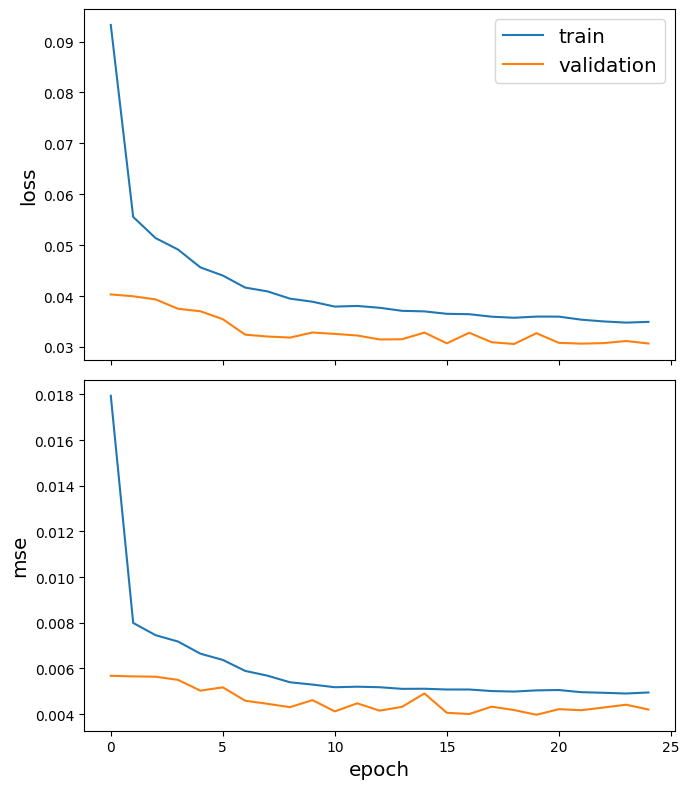

In [25]:
import stellargraph as sg
sg.utils.plot_history(history)

In [26]:
ythat = model.predict(trainX)
yhat = model.predict(testX)

27/27 [==============================] - 0s 11ms/step


In [27]:
## Rescale values
max_speed = train_data.max()
min_speed = train_data.min()

## actual train and test values
train_rescref = np.array(trainY * max_speed)
test_rescref = np.array(testY * max_speed)

In [28]:
## Rescale model predicted values
train_rescpred = np.array((ythat) * max_speed)
test_rescpred = np.array((yhat) * max_speed)

In [29]:
## Naive prediction benchmark (using previous observed value)

testnpred = np.array(testX)[
    :, :, -1
]  # picking the last speed of the 10 sequence for each segment in each sample
testnpredc = (testnpred) * max_speed

In [30]:
## Performance measures

seg_mael = []
seg_masel = []
seg_nmael = []

for j in range(testX.shape[-1]):

    seg_mael.append(
        np.mean(np.abs(test_rescref.T[j] - test_rescpred.T[j]))
    )  # Mean Absolute Error for NN
    seg_nmael.append(
        np.mean(np.abs(test_rescref.T[j] - testnpredc.T[j]))
    )  # Mean Absolute Error for naive prediction
    if seg_nmael[-1] != 0:
        seg_masel.append(
            seg_mael[-1] / seg_nmael[-1]
        )  # Ratio of the two: Mean Absolute Scaled Error
    else:
        seg_masel.append(np.NaN)

print("Total (ave) MAE for NN: " + str(np.mean(np.array(seg_mael))))
print("Total (ave) MAE for naive prediction: " + str(np.mean(np.array(seg_nmael))))
print(
    "Total (ave) MASE for per-segment NN/naive MAE: "
    + str(np.nanmean(np.array(seg_masel)))
)
print(
    "...note that MASE<1 (for a given segment) means that the NN prediction is better than the naive prediction."
)

Total (ave) MAE for NN: 3.996268793107102
Total (ave) MAE for naive prediction: 4.0188321786023655
Total (ave) MASE for per-segment NN/naive MAE: 1.0717426956306706
...note that MASE<1 (for a given segment) means that the NN prediction is better than the naive prediction.


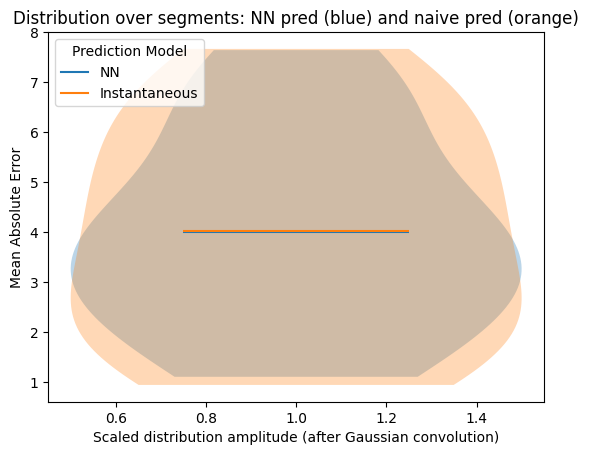

In [31]:
# plot violin plot of MAE for naive and NN predictions
fig, ax = plt.subplots()
# xl = minsl

ax.violinplot(
    list(seg_mael), showmeans=True, showmedians=False, showextrema=False, widths=1.0
)

ax.violinplot(
    list(seg_nmael), showmeans=True, showmedians=False, showextrema=False, widths=1.0
)

line1 = mlines.Line2D([], [], label="NN")
line2 = mlines.Line2D([], [], color="C1", label="Instantaneous")

ax.set_xlabel("Scaled distribution amplitude (after Gaussian convolution)")
ax.set_ylabel("Mean Absolute Error")
ax.set_title("Distribution over segments: NN pred (blue) and naive pred (orange)")
plt.legend(handles=(line1, line2), title="Prediction Model", loc=2)
plt.show()

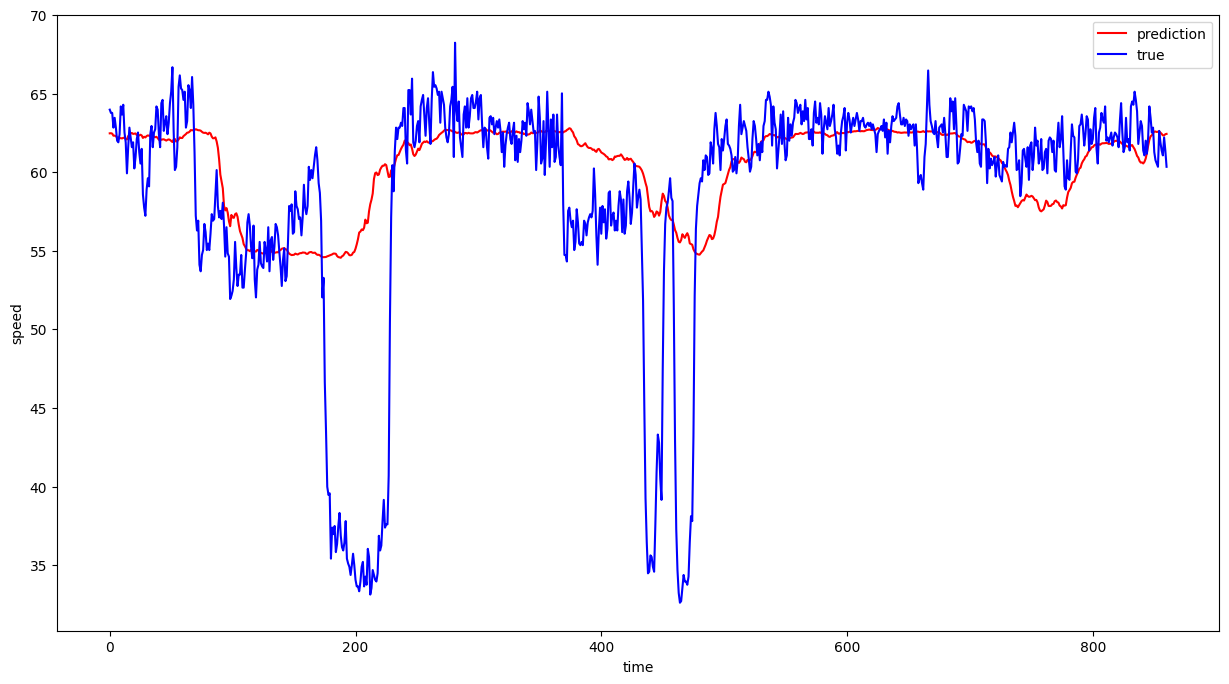

In [32]:
##all test result visualization
fig1 = plt.figure(figsize=(15, 8))
#    ax1 = fig1.add_subplot(1,1,1)
a_pred = test_rescpred[:, 100]
a_true = test_rescref[:, 100]
plt.plot(a_pred, "r-", label="prediction")
plt.plot(a_true, "b-", label="true")
plt.xlabel("time")
plt.ylabel("speed")
plt.legend(loc="best", fontsize=10)
plt.show()

In [33]:
print("GPU available:", tf.config.list_physical_devices('GPU'))

GPU available: []


In [34]:
physical_devices = tf.config.list_physical_devices('GPU')
tf.config.set_visible_devices(physical_devices[1], 'GPU')
physical_devices

IndexError: list index out of range